In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Changing Working Directory
os.chdir('/Users/huzefa/IITM-Pravartak-Ai-Ml-Ds-Python/Data-Preparation')

In [ ]:
#Importing all the necessasry datasets
acDetails=pd.read_table('../Datasets/acDetails.txt',index_col=0,sep='\t')
demoDetails=pd.read_csv('../Datasets/demoDetails.csv',index_col=0)
serviceDetails=pd.read_csv('../Datasets/serviceDetails.csv',index_col=0)

In [4]:
#Checking if determined common attribute is actually common and consistent across all the dataframes
acDetails.customerID.equals(demoDetails.customerID)
demoDetails.customerID.equals(serviceDetails.customerID)

True

In [5]:
#Checking for any duplicate record in any file (Common Unique attribute 'customer_ID') can be used to check
#Checking count of duplicate records if any present
print(len(np.unique(acDetails['customerID'])))
print(len(np.unique(demoDetails['customerID'])))
print(len(np.unique(serviceDetails['customerID'])))

250
250
250


In [6]:
#Determining the duplicate record
acDetails[acDetails.duplicated(['customerID'],keep=False)]
demoDetails[demoDetails.duplicated(['customerID'],keep=False)]
serviceDetails[serviceDetails.duplicated(['customerID'],keep=False)]

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
46,9067-SQTNS,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No
251,9067-SQTNS,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No


In [7]:
#Removing duplicate record
acDetails=acDetails.drop_duplicates()
demoDetails=demoDetails.drop_duplicates()
serviceDetails=serviceDetails.drop_duplicates()

In [8]:
#Now joining the dataframes into one dataframe
churn=pd.merge(demoDetails, acDetails, on='customerID')
churn=pd.merge(churn, serviceDetails, on='customerID')
churn1=churn.copy()

In [9]:
#Getting basic information of churn1 about the count of null values and datatypes of different variables
churn1.info()
churn1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        250 non-null    object 
 1   gender            250 non-null    object 
 2   SeniorCitizen     245 non-null    float64
 3   Partner           250 non-null    object 
 4   Dependents        250 non-null    object 
 5   tenure            250 non-null    object 
 6   Contract          250 non-null    object 
 7   PaperlessBilling  250 non-null    object 
 8   PaymentMethod     250 non-null    object 
 9   MonthlyCharges    240 non-null    float64
 10  TotalCharges      235 non-null    float64
 11  PhoneService      250 non-null    object 
 12  MultipleLines     250 non-null    object 
 13  InternetService   250 non-null    object 
 14  OnlineSecurity    250 non-null    object 
 15  OnlineBackup      250 non-null    object 
 16  DeviceProtection  250 non-null    object 
 1

customerID           0
gender               0
SeniorCitizen        5
Partner              0
Dependents           0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      10
TotalCharges        15
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Churn                0
dtype: int64

In [10]:
#Using a quick approach to quickly get the above information about objects using lambda function
categorical_data=churn1.select_dtypes(include=['object']).copy()
categorical_data=categorical_data.drop(['customerID','tenure'],axis=1)#dropping these because they overpopulate the information
frequencies=categorical_data.apply(lambda x: x.value_counts()).T.stack()
print(frequencies)

gender            Female                       124.0
                  Male                         126.0
Partner           No                           126.0
                  Yes                          124.0
Dependents        1@#                            6.0
                  No                           171.0
                  Yes                           73.0
Contract          Month-to-month               133.0
                  One year                      55.0
                  Two year                      62.0
PaperlessBilling  No                            98.0
                  Yes                          152.0
PaymentMethod     Bank transfer (automatic)     58.0
                  Credit card (automatic)       57.0
                  Electronic check              80.0
                  Mailed check                  55.0
PhoneService      No                            27.0
                  Yes                          223.0
MultipleLines     No                          

In [12]:
#Cleaning and making 'customerID' consistent
#Length of 'customerID' must be 10 and pattern as '[nnnn]-[ccccc]' first 4 numbers + - + last 5 characters
len_ind=[i for i,value in enumerate(churn1.customerID) if len(value)!=10] #All have length = 10

import re

pattern='^[0-9]{4,4}-[A-Z]{5,5}'
type(pattern)
p=re.compile(pattern)
type(p)

q=[i for i,value in enumerate(churn1.customerID) if p.match(str(value))==None]
print(q) #At indices 2,3,4,6 pattern doesn't match
#Two types of anomalies present 1.) '/' insted of '-' 2.) first 5 characters + - + last 4 digits
fp1=re.compile('^[A-Z]{5,5}-[0-9]{4,4}')
fp2=re.compile('^[0-9]{4,4}/[A-Z]{5,5}')

for i in q:
    false_str=str(churn1.customerID[i])
    if(fp1.match(false_str)):
        str_splits=false_str.split('-')
        churn1.customerID[i]=str_splits[1]+'-'+str_splits[0]
    elif(fp2.match(false_str)):
        str_splits=false_str.split('/')
        churn1.customerID[i]=false_str.replace('/','-')

[2, 3, 4, 6]


/var/folders/4n/qtwztn957tq_p6qm84yxsr740000gn/T/ipykernel_4839/115345956.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  churn1.customerID[i]=false_str.replace('/','-')
/var/folders/4n/qtwztn957tq_p6qm84yxsr740000gn/T/ipykernel_4839/11

In [13]:
#Rechecking if customerID is now cleaned or consistent or not
np.unique(churn1['customerID'])

array(['0115-TFERT', '0187-WZNAB', '0193-ESZXP', '0195-IESCP',
       '0203-HHYIJ', '0307-BCOPK', '0374-IOEGQ', '0402-CQAJN',
       '0431-APWVY', '0440-MOGPM', '0495-ZBNGW', '0529-ONKER',
       '0567-GGCAC', '0587-DMGBH', '0601-WZHJF', '0607-DAAHE',
       '0883-EIBTI', '0913-XWSCN', '0958-YHXGP', '1090-PYKCI',
       '1094-BKOSX', '1096-ADRUX', '1114-CENIM', '1116-FRYVH',
       '1171-TYKUR', '1230-QAJDW', '1282-IHQAC', '1306-RPWXZ',
       '1347-KTTTA', '1363-TXLSL', '1422-DGUBX', '1485-YDHMM',
       '1561-BWHIN', '1567-DSCIC', '1591-MQJTP', '1750-CSKKM',
       '1754-GKYPY', '1764-VUUMT', '1785-BPHTP', '1814-DKOLC',
       '1877-HKBQX', '1918-ZBFQJ', '1945-XISKS', '1972-XMUWV',
       '1976-AZZPJ', '2000-MPKCA', '2027-WKXMW', '2038-OEQZH',
       '2040-XBAVJ', '2189-UXTKY', '2190-PHBHR', '2272-JKMSI',
       '2307-FYNNL', '2311-QYMUQ', '2316-ESMLS', '2333-KWEWW',
       '2359-QWQUL', '2361-FJWNO', '2452-MRMZF', '2458-EOMRE',
       '2481-SBOYW', '2538-OIMXF', '2589-AYCRP', '2592-

In [14]:
#Cleaning 'SeniorCitizen' resolving nan values (using mode)
churn1['SeniorCitizen'].fillna(churn1['SeniorCitizen'].mode()[0],inplace=True)
churn1.isnull().sum() #All values filled
churn1['SeniorCitizen']=churn1.SeniorCitizen.astype(int)

/var/folders/4n/qtwztn957tq_p6qm84yxsr740000gn/T/ipykernel_4839/809960892.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn1['SeniorCitizen'].fillna(churn1['SeniorCitizen'].mode()[0],inplace=True)


In [15]:
#Cleaning 'Dependents' removing abnormal values
pd.crosstab(index=churn1['Dependents'], columns='count')
churn1['Dependents']=churn1['Dependents'].replace('1@#','No')

In [16]:
#Cleaning 'tenure' and making it consistent int datatype
churn1['tenure']=churn1.tenure.replace("Four",4)
churn1['tenure']=churn1.tenure.replace("One",1)
churn1['tenure']=churn1.tenure.astype(int)
np.unique(churn1['tenure'])

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   21,   22,   25,
         27,   28,   29,   30,   31,   32,   34,   36,   37,   38,   39,
         40,   41,   42,   43,   44,   45,   46,   47,   48,   49,   50,
         51,   52,   53,   54,   55,   56,   57,   58,   59,   61,   62,
         63,   64,   65,   66,   67,   68,   69,   70,   71,   72,  964,
        969,  971,  992,  994, 1008])

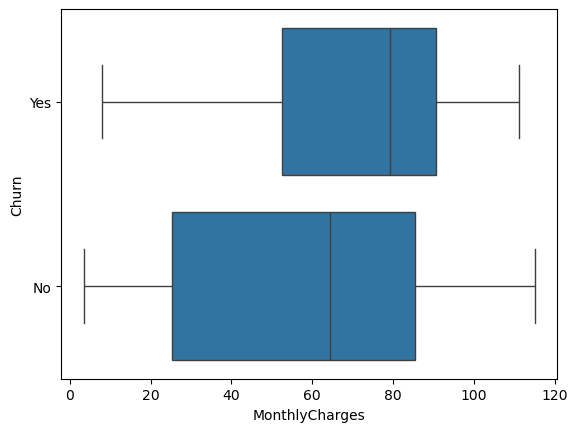

In [17]:
#Cleaning 'MonthlyCharges' filling nan values
churn1.describe()
sns.boxplot(x=churn1['MonthlyCharges'],y=churn1['Churn'])
plt.show() #The plot show that the mean of customers who have churned and those who haven't anre not same, hence need to calculate seperate means for both categories
churn1.groupby('Churn')['MonthlyCharges'].mean()
churn1['MonthlyCharges']=churn1.groupby('Churn')['MonthlyCharges'].transform(lambda x:x.fillna(x.mean()))

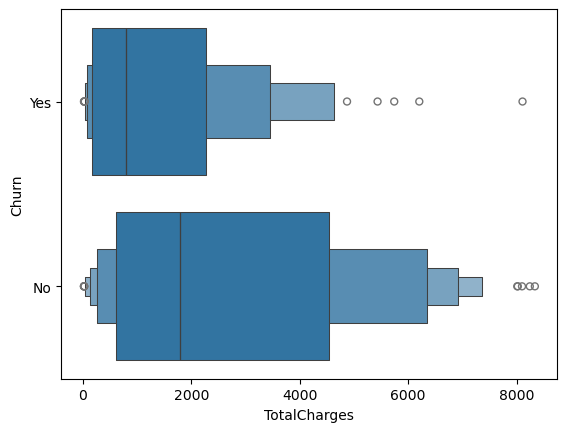

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        250 non-null    object 
 1   gender            250 non-null    object 
 2   SeniorCitizen     250 non-null    int64  
 3   Partner           250 non-null    object 
 4   Dependents        250 non-null    object 
 5   tenure            250 non-null    int64  
 6   Contract          250 non-null    object 
 7   PaperlessBilling  250 non-null    object 
 8   PaymentMethod     250 non-null    object 
 9   MonthlyCharges    250 non-null    float64
 10  TotalCharges      250 non-null    float64
 11  PhoneService      250 non-null    object 
 12  MultipleLines     250 non-null    object 
 13  InternetService   250 non-null    object 
 14  OnlineSecurity    250 non-null    object 
 15  OnlineBackup      250 non-null    object 
 16  DeviceProtection  250 non-null    object 
 1

In [18]:
#Similarly cleaning 'TotalCharges' and doing same as above 'MonthlyCharges'
sns.boxenplot(x=churn1['TotalCharges'],y=churn1['Churn'])
plt.show()
churn1.groupby('Churn')['TotalCharges'].mean()
churn1['TotalCharges']=churn1.groupby('Churn')['TotalCharges'].transform(lambda x:x.fillna(x.mean()))
churn1.info()

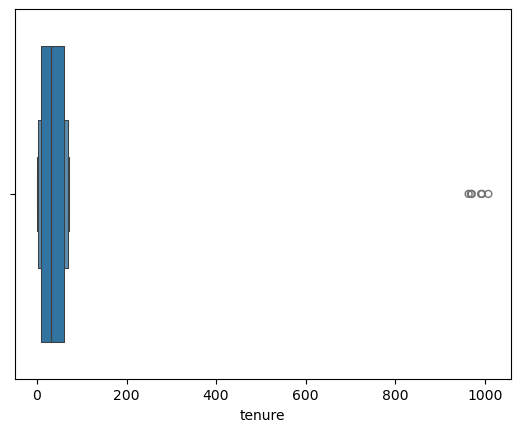

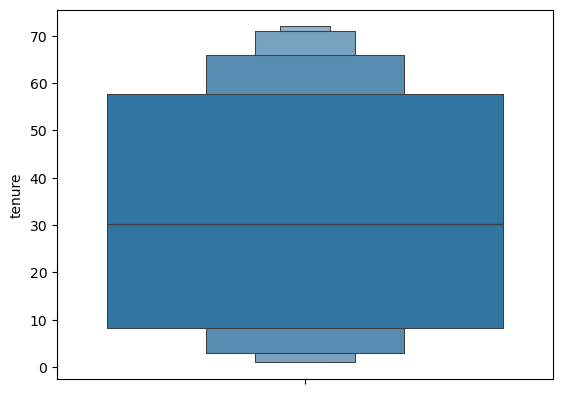

In [19]:
#I also need to deal with outliers if present in any data
sns.boxenplot(x=churn1['tenure'])
plt.show() #Outliers present so need to replace them with the median for any value greater than 500 as outlier lie after that in this case
churn1['tenure']=np.where(churn1['tenure']>=500,churn1['tenure'].median(),churn1['tenure'])
sns.boxenplot(y=churn1['tenure'])
plt.show()

In [20]:
#Also there exists a logical fallacy about the 'InternetService' and its allied services. It may be possible if 'InternetServices' may be marked as 'No' but its allied services may be marked 'Yes', can be vice versa also
#To solve this 2 approaches are there 1.) Brute force where if 'InternetService' marked 'No' then all the allied services also mark them as 'No'. 2) Logical Approach where if 'InternetService' marked 'No' but 2 or more allied services marked as 'Yes' this may indicate that possible error occured in 'InternetService' and it is marked as 'Yes'
#Solving using logical approach
y=churn1[(churn1.InternetService=='No')] #Subsetting the 'No' 'InternService'
z=y.iloc[:,13:20] #Further subsetting the 'No' 'InternService' and its allied services

for i, row in z.iterrows():
    yes_cnt=row.str.count('Yes').sum()
    if(yes_cnt>=2):
        z.loc[i].InternetService='Yes'
    else:
        z.loc[i,:]='No interntet service'

In [21]:
#Demo for Random sampling
import random
p1=list(range(1,20))
print(p1)

#Without replacement
srswor=random.sample(population=p1,k=10)
print(srswor)
#With replacement
srswr=random.choices(population=p1,k=10)
print(srswr)
churn1.to_csv('Clean_Churn_Data.csv',index=False)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[8, 6, 12, 1, 19, 13, 7, 14, 9, 10]
[18, 6, 12, 7, 19, 15, 10, 9, 6, 18]
